# Expand window

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load train and test data

In [4]:
train_data = pd.read_csv("../../data/train/pre_processed.csv")

print(train_data.shape)

train_data.sample(5)

(164309, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
87333,10087334,32000.0,5 years,Mortgage,114000.0,VERIFIED - income source,debt_consolidation,20.58,1,13,43,Female,3
16384,10016385,5375.0,10+ years,Own,12174.0,VERIFIED - income,debt_consolidation,19.71,0,4,4,Male,2
117266,10117267,24000.0,8 years,Mortgage,117600.0,VERIFIED - income,credit_card,12.57,0,13,29,Male,1
163753,10163754,11075.0,10+ years,Mortgage,60000.0,VERIFIED - income source,debt_consolidation,15.31,0,20,22,Male,2
126530,10126531,13250.0,6 years,Rent,34000.0,not verified,debt_consolidation,21.00,2,7,16,Male,3


# Analysis

In [5]:
for i in range(1,4):
    print("Interest Rate Category:", i)
    print("-------------------------")
    print("Loan Min:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].min())
    print("Loan Max:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].max())
    print("Loan Mean:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].mean())
    
    print(" ")

Interest Rate Category: 1
-------------------------
Loan Min: 500.0
Loan Max: 35000.0
Loan Mean: 13351.44353073419
 
Interest Rate Category: 2
-------------------------
Loan Min: 500.0
Loan Max: 35000.0
Loan Mean: 13419.251912723152
 
Interest Rate Category: 3
-------------------------
Loan Min: 1000.0
Loan Max: 35000.0
Loan Mean: 16007.801678821153
 


In [6]:
purposes = list(train_data['Purpose_Of_Loan'].unique())
purposes

['car',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'major_purchase',
 'other',
 'medical',
 'small_business',
 'moving',
 'wedding',
 'vacation',
 'house',
 'educational',
 'renewable_energy']

In [7]:
sorted_loan = train_data['Purpose_Of_Loan'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)
sorted_loan

,Share
debt_consolidation,59.096580
credit_card,22.326227
home_improvement,5.641200
other,5.079454
major_purchase,2.090573
small_business,1.455794
car,1.147229
medical,0.937867
moving,0.592786
vacation,0.509406


In [14]:
for purpose in sorted_loan.index[0:4]:
    print(purpose)
    print("================")
    print(train_data.loc[train_data['Purpose_Of_Loan'] == purpose, 'Home_Owner'].value_counts(ascending=False))
    print("")

debt_consolidation
Rent        48674
Mortgage    41526
Own          6878
Other          20
None            3
Name: Home_Owner, dtype: int64

credit_card
Rent        18519
Mortgage    15401
Own          2745
Other          14
None            5
Name: Home_Owner, dtype: int64

home_improvement
Mortgage    6153
Rent        2075
Own         1039
Other          2
Name: Home_Owner, dtype: int64

other
Rent        4769
Mortgage    2809
Own          761
Other          5
None           2
Name: Home_Owner, dtype: int64



#### From above data we can see that main purpose of loan is through 'debt consolidation' and that too for people who are staying in 'Rent' houses

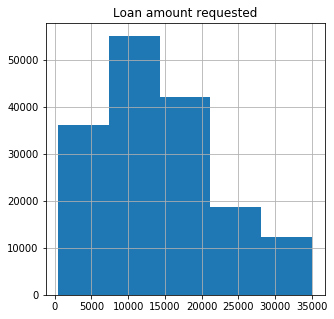

In [19]:
train_data['Loan_Amount_Requested'].hist(bins=5, figsize=(5,5));
plt.title("Loan amount requested");

Data is skewed around 5k-20k